## Importowanie bibliotek i wczytanie ramki

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display
import nltk
import warnings 

warnings.filterwarnings("ignore")

In [56]:
allBooks = pd.read_csv("AllBooks_baseline_DTM_Unlabelled.csv").rename(columns={'# foolishness': 'foolishness'})

In [57]:
allBooks.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
import re

regexp_not_small_letters = re.compile("[^a-z]")

print(list(filter(regexp_not_small_letters.match, allBooks.columns)))

[]


Powyższa komórka pokazuje, że w naszej ramce danych nie ma słów zawierających znaki specjalne, spacje, wielkie litery czy cyfry.

## Stop words removal

In [59]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
to_be_removed = [word for word in allBooks.columns.values if word in stop_words]
print(to_be_removed)

['i', 'out', 'for', 'we', 'o', 'who', 'as', 'down', 'once', 'there', 'in', 'all', 'he', 't', 'this', 'the', 'at', 's', 'such', 'just']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Usuwamy z naszej ramki danych wszystkie słowa uznawane w języku angielskim za stop wordy.

In [60]:
allBooks = allBooks.drop(to_be_removed, axis=1)
print("out" in allBooks.columns.values)

False


Jak widać usuwanie powiodło się.

## Stemming

In [106]:
from nltk.stem import LancasterStemmer

ls = LancasterStemmer()
allBooks_stemmed = pd.DataFrame()

for el in allBooks.columns.values:
    
    col = ls.stem(el)

    if col in allBooks_stemmed.columns.values:
        allBooks_stemmed[col] = allBooks_stemmed[col] + allBooks[el]
        

    else:
        allBooks_stemmed[col] = allBooks[el]

allBooks = allBooks_stemmed

## Polaryzacja

In [63]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

allBooks_polarity = allBooks.copy()
columns = allBooks_polarity.columns
allBooks_polarity['polarity'] = 0
x = pd.DataFrame()
x['sum']=allBooks.sum(axis=1)

for string in columns:
    allBooks_polarity['polarity']+=allBooks_polarity[string]*polarity(string)/x['sum']

allBooks_polarity.head()

,fool,hath,wholesom,takest,feel,ang,vaivaswat,matrix,kindl,convict,...,foothold,invert,lifeless,postpon,stout,take,kettl,thinkest,attir,polarity
0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022432
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004808
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012401
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006417
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


TextBlob polarity wyznacza liczę z przedziału od -1 do 1, która ma określić polaryzację danego tekstu.( -1 treść negatywna, 1 treść pozytywna ). W naszym przypadku działamy na słowach a nie pełnych zdaniach.

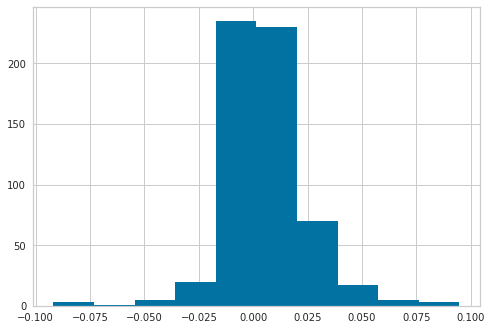

In [64]:
allBooks_polarity['polarity'].hist()

Wyniki głównie są bliskie zeru. Czyli średnie wartości polaryzacji dla słów z danego rozdziału nie są mocno spolaryzowane ani pozytywnie ani negatywnie.

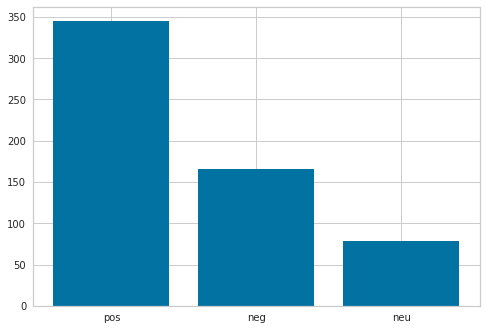

In [65]:
import matplotlib.pyplot as plt
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
words_polarity=allBooks_polarity['polarity'].\
   map(lambda x: sentiment(x))

plt.bar(words_polarity.value_counts().index,
        words_polarity.value_counts())

Jeżeli rozróżnimy pozytywny wynik jako większy od zera , negatywny mniejszy od zera a neutralny równy zero, to otrzymujemy, że podane rozdziały składają się najczęściej z pozytywnych słów.

In [101]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


def silhouette(df, i):
    if i == 1:
        model = KMeans(random_state= 0)
    elif i == 2:
        model = Birch(threshold=5)
    elif i == 3: 
        model = AgglomerativeClustering() 
    cluster_num_seq = range(2, 10)  
    scores = []
    for k in cluster_num_seq:
        model.n_clusters = k
        labels = model.fit_predict(df)
        score = silhouette_score(df, labels)
        scores.append(score)

    plt.plot(cluster_num_seq, scores, 'go-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette plot')
    plt.show()



def calinski_harabasz(i):
    if i == 1:
        visualizer = KElbowVisualizer(
        KMeans(random_state= 0), k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    elif i == 2:
        visualizer = KElbowVisualizer(
        Birch(threshold=5), k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    elif i == 3:
        visualizer = KElbowVisualizer(
        AgglomerativeClustering() , k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=False
    )
    else: return 
    visualizer.fit(allBooks)       
    visualizer.show()

## Model wstępny

### KMeans

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


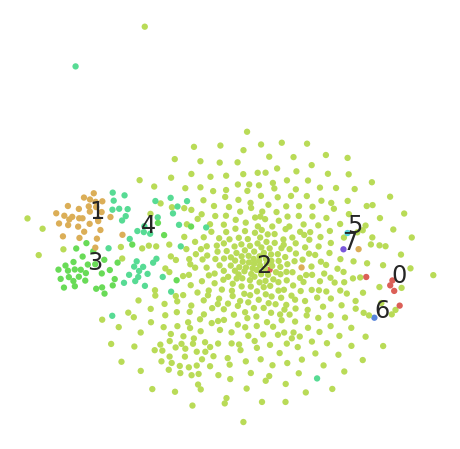

In [79]:
random_state = 10
tSNE = TSNE(random_state=random_state, verbose=0)
books_proj = tSNE.fit_transform(allBooks)

kmeans = KMeans(n_clusters=8)
y = kmeans.fit_predict(allBooks)

scatter(books_proj, y)
plt.show()

Na wizualizacji TSNE możemy zauważyć, że niektórym klastrom przypisano tylko jeden lub niewielką liczbę rozdziałów. Po przeanalizowaniu treści książek możemy zauważyć, że najmniejsza książka ma bodajże 10 czy 11 rozdziałów, zatem wyniki są bardzo rozbieżne


#### Metoda silhouette

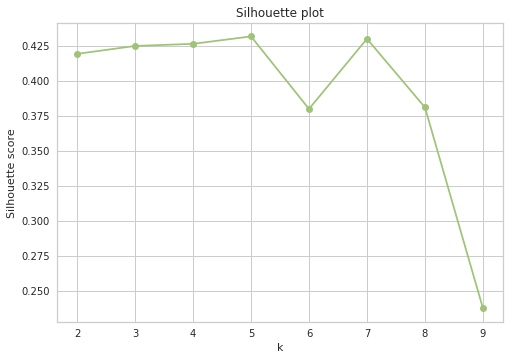

In [91]:
silhouette(allBooks, 1)

Warto zauwazyc, ze metoda silhouette jako optymalną liczbę klastrów proponuje [2-5] lub 7, lecz jak możemy zauważyć z opisu naszej ramki, dysponujemy 8 książkami

#### Metoda Calinskiego-Harabasza

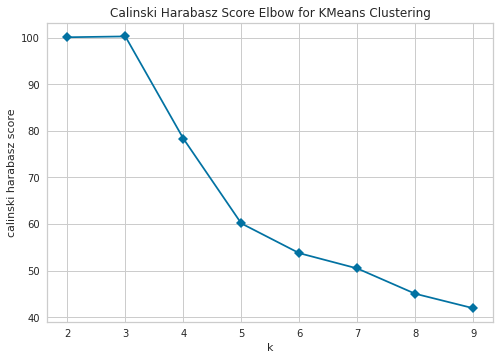

In [102]:
calinski_harabasz(1)

W przypadku metryki Calinski-Harabasz, rezultaty są zdecydowanie inne, jako optymalną liczbę klastrów proponuje nam 2-3 klastry

### BIRCH

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


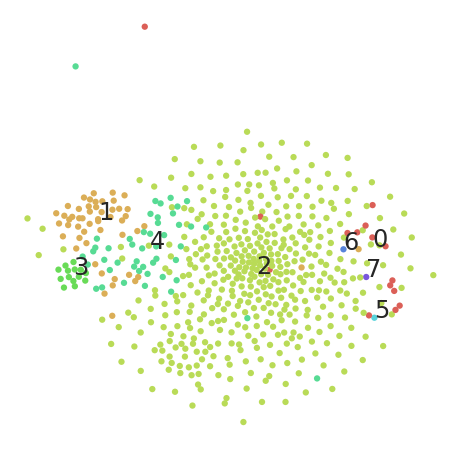

In [81]:
from sklearn.cluster import Birch


model = Birch(threshold=5, n_clusters=8)
x = model.fit(allBooks)
yhat = model.predict(allBooks)
scatter(books_proj, yhat)
plt.show()

#### Metoda silhouette

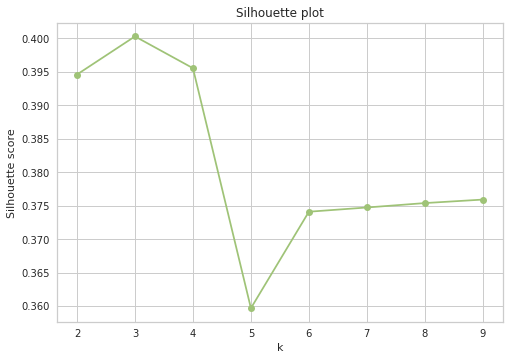

In [92]:
silhouette(allBooks, 2)

#### Metoda Calinski-Harabasz 

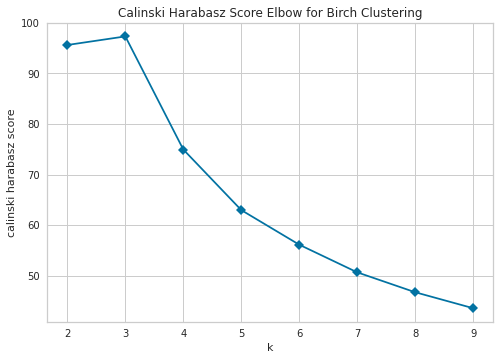

In [103]:
calinski_harabasz(2)

Możemy zauważyć, że również w przypadku tego modelu metryk pokazują najbardziej optymalne wyniki zdecydowanie niezgodne z rzeczywistością 

### AgglomerativeClustering

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


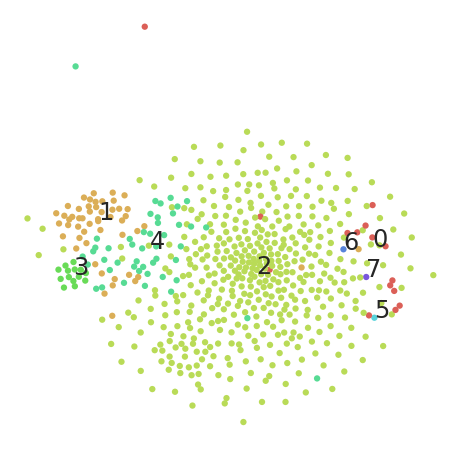

In [70]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=8)
yhat = model.fit_predict(allBooks)
scatter(books_proj, yhat)
plt.show()

#### Metoda silhouette

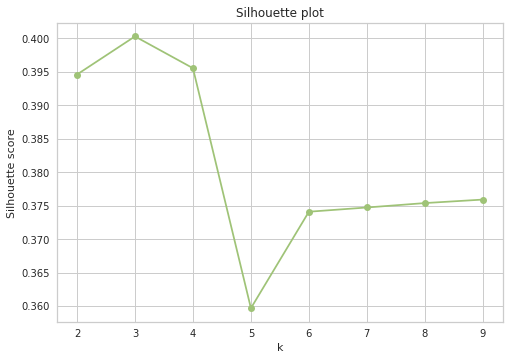

In [105]:
silhouette(allBooks, 3)

#### Metoda Calinskiego-Harabasza

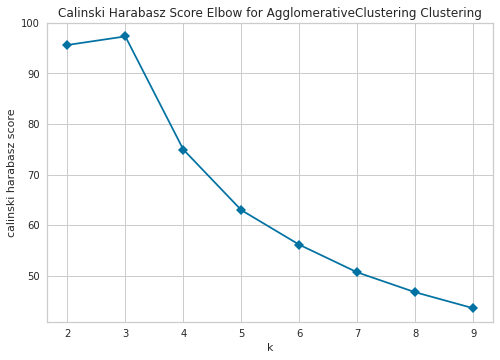

In [104]:
calinski_harabasz(3)

Również dla AgglomerativeClusteringu wyniki są podobne

#### Wnioski

* Możemy zauważyć, że aktualne predykcje nie są zadowalające
* Myślimy o stworzeniu alternatywnej ramki danych, które zawierałaby takie cechy jak średnią polaryzacje słów dla wyrazów , liczbę wyrazów w danym rozdziale itd.
* Istnieje pewna szansa, że taka redukcja informacji mogłaby pomóc nam w klasteryzacji